In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io
from tqdm import tqdm
import os

from neuroanalysis import spike

mouse_name = "ts8_SC"
date = "180415"
session_name = "sine_grating"
#ts9_SC_180419_sine_grating

experiment_id = "{mouse}_{date}_{session}".format(mouse=mouse_name, date=date, session=session_name)
_data = os.path.join("data/3GratingSequence/SpikeTrain/", experiment_id)
_dir = os.path.join("data/3GratingSequence/CHART/", experiment_id)
_temp = "data/3GratingSequence/temp"
if not os.path.isdir(_dir):
    os.mkdir(_dir)

# trim the marker dataframe into desired format.
marker_table = pd.read_csv(_data+'.csv')
trim = marker_table[marker_table.colorname!='black'].copy(deep=True)
#trim = marker_table[marker_table.marker!='gray'].copy(deep=True)
trim.columns = ['time','marker']
trim.index = np.arange(0,len(trim))
# trim

spike_trains, spike_marker = spike.import_spike_train_data(session=session_name, mouse_id=mouse_name, 
                              mat=_data+".mat",data_dir='.',
                              csv=trim)
print(list(spike_trains.keys()))

idx = 0
ABABB_start = []
ABABA_start = []
while idx < len(spike_marker.table_marker)/5:
    trial = spike_marker.table_marker[idx*5:idx*5+5]
    idx += 1
    #print(idx)
    if trial.marker.values[-1] == 'B':
        ABABB_start.append(trial.time.values[0])
    else:
        ABABA_start.append(trial.time.values[0])
len(ABABB_start)

marker shift: 0
['WBC02a', 'WBC02b', 'WBC03a', 'WBC04a', 'WBC06a', 'WBC08a', 'WBC09a', 'WBC10a', 'WBC11a', 'WBC12a', 'WBC14a', 'WBC15a', 'WBC16a']


23

In [74]:
def _gaussian_kernel(sigma, train):
    """The gaussian kernel.
    $$w(\tau) = \\frac{1}{\sqrt{2 \pi} \sigma_w}
    \exp(-\\frac{\\tau^2}{2 \sigma^2_w})$$
    """
    def kkernel(t):
        
        _ndim = np.ndim(t)
        _to_shape = [item for item in np.shape(t)]
        _to_shape.append(1)
        
        _t = train - t.reshape(_to_shape)
        _raw = 1/(np.sqrt(2*np.pi)*sigma) * np.exp(- _t**2/(2*sigma**2))
        return np.sum(_raw, _ndim)
    
    return kkernel

In [75]:
kd = _gaussian_kernel(0.4, spike_trains["WBC11a"].spike_train)
kd(np.linspace(0,10,100))

array([ 0.03306582,  0.07408788,  0.15587848,  0.30797127,  0.57139161,
        0.99557079,  1.62907303,  2.50354279,  3.61353254,  4.89878584,
        6.23795941,  7.4612983 ,  8.38357117,  8.84959485,  8.7773558 ,
        8.18256545,  7.17500182,  5.9283181 ,  4.63533769,  3.46503246,
        2.53397949,  1.89696593,  1.55345409,  1.46257269,  1.55986984,
        1.77224283,  2.03042398,  2.27942587,  2.48656642,  2.64550899,
        2.77456629,  2.90875789,  3.08715149,  3.33881219,  3.67147997,
        4.06664494,  4.48304088,  4.86793986,  5.1726111 ,  5.36614075,
        5.44195612,  5.41445262,  5.30790536,  5.14373262,  4.9327529 ,
        4.67592075,  4.37211635,  4.02788417,  3.66349503,  3.31212359,
        3.012479  ,  2.79799014,  2.686717  ,  2.67566394,  2.74165772,
        2.84891692,  2.96132736,  3.05582527,  3.13277507,  3.2200754 ,
        3.36962136,  3.64698433,  4.11704357,  4.82938093,  5.80729584,
        7.04315708,  8.50053713, 10.12079381, 11.82976289, 13.54

In [91]:
roi = (-2, 24)
nbins = 100
def _apply_linear_filter_withroi(k, starts, roi=(0,0), nbins=100, pbar=None):
    _X = np.linspace(roi[0], roi[1], nbins)
    X = np.array(ABABA_start).reshape(len(ABABA_start),1) + _X
    return X
    

XX = _apply_linear_filter_withroi(kd, ABABA_start, roi)

In [85]:
import time

In [94]:
t = time.time()
dd=kd(XX[1:100])
print(time.time() - t)

def trial():
    for i in range(100):
        kd(XX[i])
t = time.time()
trial()
print(time.time() - t)

4.094098091125488
1.7431342601776123


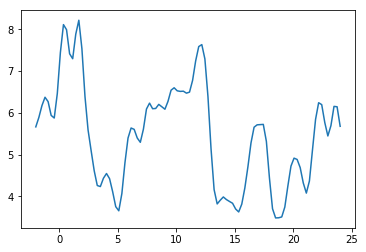

In [93]:
_X = np.linspace(roi[0], roi[1], nbins)
plt.plot(_X, np.mean(dd,0))

In [103]:
import time

In [104]:
dim = 600
a = np.random.rand(dim,dim,dim)
b = np.random.rand(dim,dim,dim)
t = time.time()
dd = a+b
print(time.time() - t)

6.351038932800293
